<a href="https://colab.research.google.com/github/answjddn005/Tensorflow-practice/blob/master/Toy_Datasets_for_Regression_Binary(Multiclass)_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf

N, n_feature = 8, 5
t_weights = tf.constant([1, 2, 3, 4, 5], dtype=tf.float32)
t_bias = tf.constant([10], dtype=tf.float32)

X = tf.random.normal(mean=0, stddev=1, shape=(N, n_feature))

Y = tf.reduce_sum(t_weights * X, axis=1) + t_bias

tf.Tensor(
[-0.06222248  8.592318    4.6142197  -1.7647142  19.695665   21.20745
  7.2537565  -3.5686607 ], shape=(8,), dtype=float32)


In [7]:
N, n_feature = 8, 5
t_weights = tf.constant([1, 2, 3, 4, 5], dtype=tf.float32)
t_bias = tf.constant([10], dtype=tf.float32)

X = tf.random.normal(mean=0, stddev=1, shape=(N, n_feature))

Y = tf.reduce_sum(t_weights * X, axis=1) + t_bias
print(Y)
Y = tf.cast(Y > 5, tf.int32)
print(Y)

tf.Tensor(
[ 4.316283  15.92445    7.7795286 14.260264   8.843142  12.372978
 22.86599    4.1672626], shape=(8,), dtype=float32)
tf.Tensor([0 1 1 1 1 1 1 0], shape=(8,), dtype=int32)


(30, 2) (30, 1)
(60, 2) (60, 1)
(90, 2) (90, 1)
(120, 2) (120, 1)
(150, 2) (150, 1)


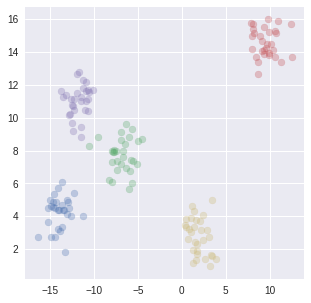

In [15]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')

N, n_feature = 30, 2

n_class = 5

X = tf.zeros(shape=(0, n_feature))
Y = tf.zeros(shape=(0, 1), dtype=tf.int32)

fig, ax = plt.subplots(figsize=(5, 5))
for class_idx in range(n_class):
  center = tf.random.uniform(minval=-15, maxval=15, shape=(2, ))
  
  x1 = center[0] + tf.random.normal(shape=(N, 1))
  x2 = center[1] + tf.random.normal(shape=(N, 1))

  x = tf.concat((x1, x2), axis=1)
  y = class_idx*tf.ones(shape=(N, 1), dtype=tf.int32)
  

  ax.scatter(x[:, 0].numpy(), x[:, 1].numpy(), alpha=0.3)

  X = tf.concat((X, x), axis=0)
  Y = tf.concat((Y, y), axis=0)

  print(X.shape, Y.shape)

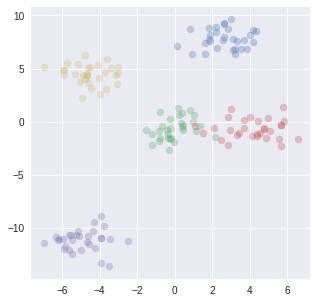

In [16]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')

N, n_feature = 30, 2

n_class = 5

X = tf.zeros(shape=(0, n_feature))
Y = tf.zeros(shape=(0, ), dtype=tf.int32)

fig, ax = plt.subplots(figsize=(5, 5))
for class_idx in range(n_class):
  center = tf.random.uniform(minval=-15, maxval=15, shape=(2, ))
  
  x1 = center[0] + tf.random.normal(shape=(N, 1))
  x2 = center[1] + tf.random.normal(shape=(N, 1))

  x = tf.concat((x1, x2), axis=1)
  y = class_idx*tf.ones(shape=(N, ), dtype=tf.int32)
  

  ax.scatter(x[:, 0].numpy(), x[:, 1].numpy(), alpha=0.3)

  X = tf.concat((X, x), axis=0)
  Y = tf.concat((Y, y), axis=0)

# One_hot incoding
Y = tf.one_hot(Y, depth=n_class, dtype=tf.int32)

In [21]:
N, n_feature = 100, 5
batch_size = 32
t_weights = tf.constant([1, 2, 3, 4, 5], dtype=tf.float32)
t_bias = tf.constant([10], dtype=tf.float32)

X = tf.random.normal(mean=0, stddev=1, shape=(N, n_feature))

Y = tf.reduce_sum(t_weights * X, axis=1) + t_bias

#for batch_idx in range(N // batch_size):
#  x = X[batch_idx * batch_size : (batch_idx + 1)*batch_size]
#  y = Y[batch_idx * batch_size : (batch_idx + 1)*batch_size]
#
# print(x.shape, y.shape)

dataset = tf.data.Dataset.from_tensor_slices((X, Y))
dataset = dataset.batch(batch_size)

for x, y in dataset:
  print(x.shape, y.shape)

(32, 5) (32,)
(32, 5) (32,)
(32, 5) (32,)
(4, 5) (4,)
